In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [314]:
columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df = pd.read_csv('data.csv', header=None, names=columns)
df['sex'] = df['sex'].map({'M': 'Male', 'F': 'Female', 'I': 'Infant'})

In [315]:
count = df['sex'].value_counts()
number_of_all_counts = len(df['sex'])
percentage = (count / number_of_all_counts) * 100
percentage = percentage.round(2)



In [316]:

array = pd.DataFrame({'Count': count, 'Percentage': percentage})
array = array.loc[['Male','Female','Infant']]
array = array.rename_axis(None) 


print(array)


        Count  Percentage
Male     1528       36.58
Female   1307       31.29
Infant   1342       32.13


In [317]:
columns2 = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
rows2 = ['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

mean_values = [df['length'].mean(), df['diameter'].mean(), df['height'].mean(), df['whole_weight'].mean(), df['shucked_weight'].mean(), df['viscera_weight'].mean(), df['shell_weight'].mean(), df['rings'].mean()]
std_values = [df['length'].std(), df['diameter'].std(), df['height'].std(), df['whole_weight'].std(), df['shucked_weight'].std(), df['viscera_weight'].std(), df['shell_weight'].std(), df['rings'].std()]
min_values = [df['length'].min(), df['diameter'].min(), df['height'].min(), df['whole_weight'].min(), df['shucked_weight'].min(), df['viscera_weight'].min(), df['shell_weight'].min(), df['rings'].min ()]
q25_values = [df['length'].quantile(0.25), df['diameter'].quantile(0.25), df['height'].quantile(0.25), df['whole_weight'].quantile(0.25), df['shucked_weight'].quantile(0.25), df['viscera_weight'].quantile(0.25), df['shell_weight'].quantile(0.25), df['rings'].quantile(0.25)]
q50_values = [df['length'].quantile(0.50), df['diameter'].quantile(0.50), df['height'].quantile(0.50), df['whole_weight'].quantile(0.50), df['shucked_weight'].quantile(0.50), df['viscera_weight'].quantile(0.50), df['shell_weight'].quantile(0.50), df['rings'].quantile(0.50)]
q75_values = [df['length'].quantile(0.75), df['diameter'].quantile(0.75), df['height'].quantile(0.75), df['whole_weight'].quantile(0.75), df['shucked_weight'].quantile(0.75), df['viscera_weight'].quantile(0.75), df['shell_weight'].quantile(0.75), df['rings'].quantile(0.75)]
max_values = [df['length'].max(), df['diameter'].max(), df['height'].max(), df['whole_weight'].max(), df['shucked_weight'].max(), df['viscera_weight'].max(), df['shell_weight'].max(), df['rings'].max()]  

array2 = pd.DataFrame({'mean': mean_values, 'std': std_values, 'min': min_values, '25%': q25_values, '50%': q50_values, '75%': q75_values, 'max': max_values}, index=rows2)
array2 = array2.loc[rows2, columns2]

print(array2)


                    mean       std     min     25%     50%     75%      max
length          0.523992  0.120093  0.0750  0.4500  0.5450   0.615   0.8150
diameter        0.407881  0.099240  0.0550  0.3500  0.4250   0.480   0.6500
height          0.139516  0.041827  0.0000  0.1150  0.1400   0.165   1.1300
whole_weight    0.828742  0.490389  0.0020  0.4415  0.7995   1.153   2.8255
shucked_weight  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   1.4880
viscera_weight  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   0.7600
shell_weight    0.238831  0.139203  0.0015  0.1300  0.2340   0.329   1.0050
rings           9.933684  3.224169  1.0000  8.0000  9.0000  11.000  29.0000


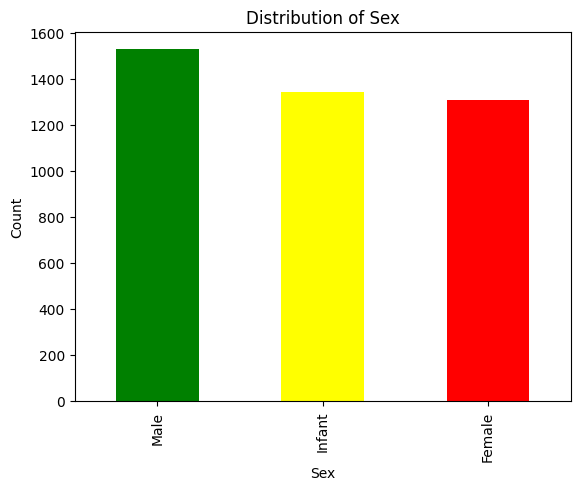

In [318]:
df['sex'].value_counts().plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title("Distribution of Sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

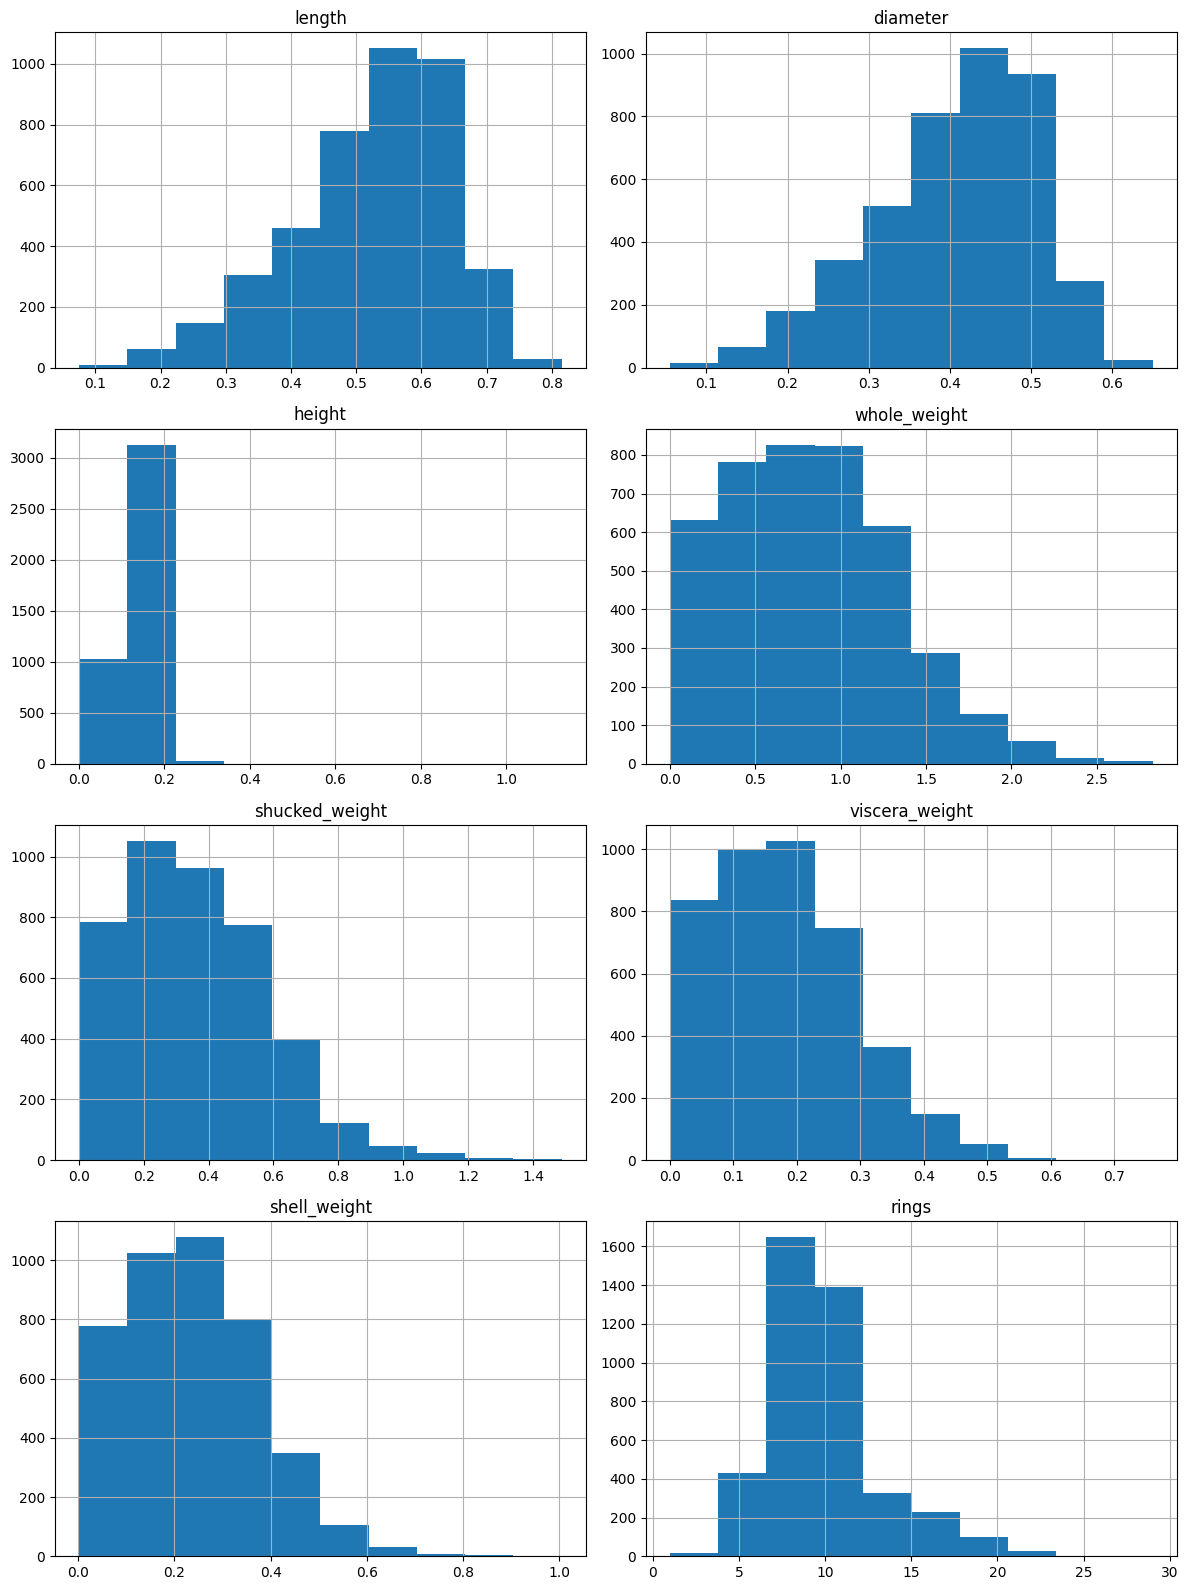

In [319]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

axes = axes.flatten()

for i, y in enumerate(rows2):
    df[y].hist(ax=axes[i])
    axes[i].set_title(y)

plt.tight_layout()
plt.show()    

In [320]:
from itertools import combinations


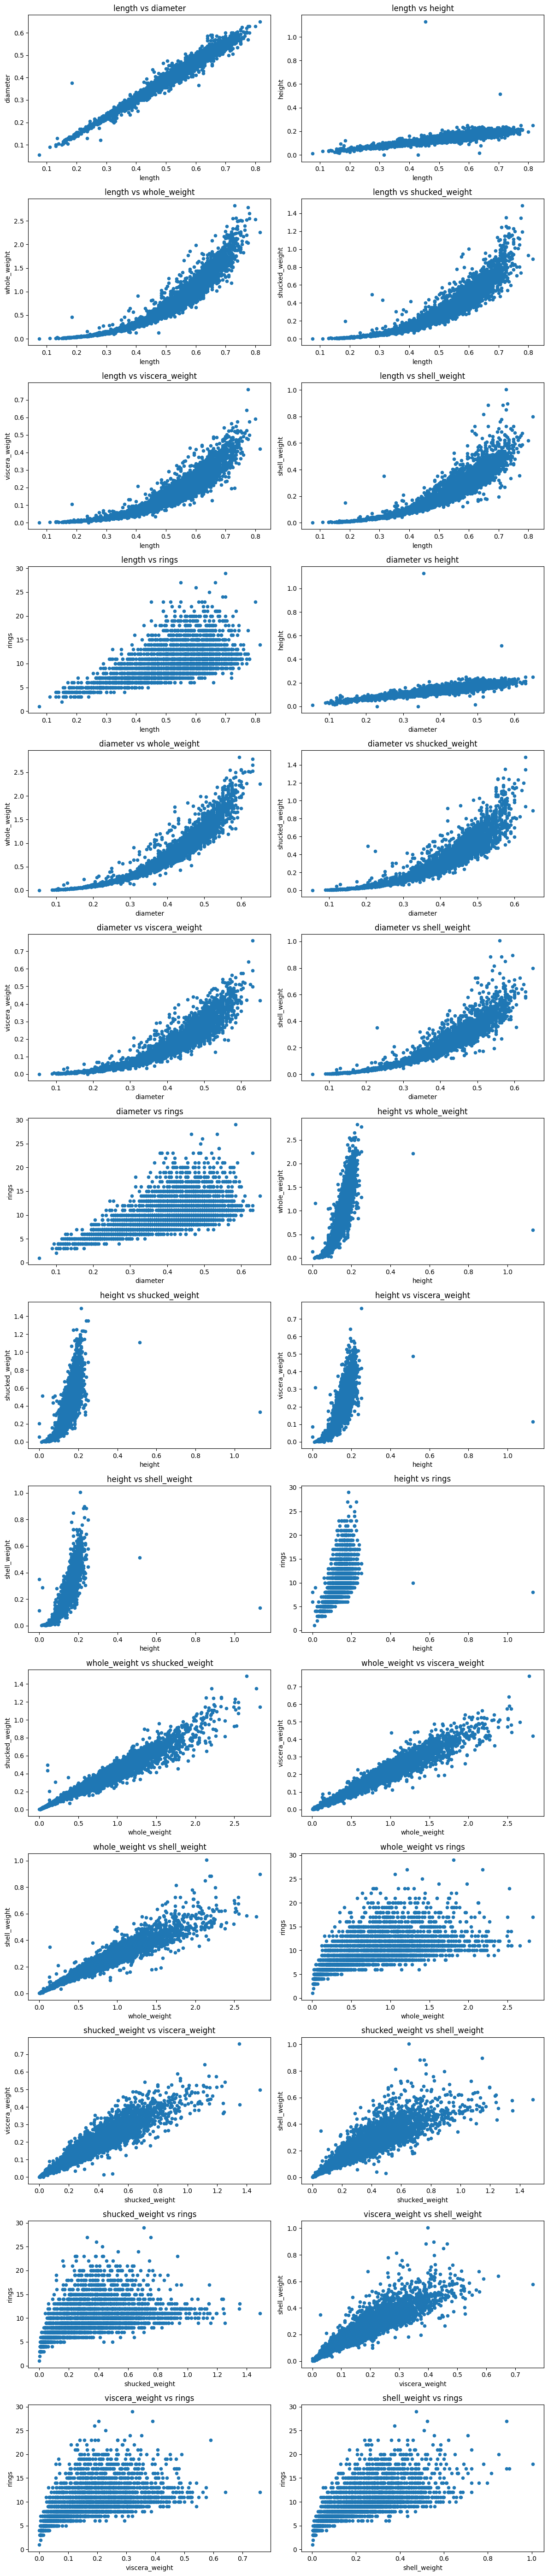

In [321]:

fig, axes = plt.subplots(14, 2, figsize=(12, 56))
axes = axes.flatten()

comb = combinations(rows2, 2)
for i, (x, y) in enumerate(comb):
    df.plot.scatter(x=x, y=y, ax=axes[i])
    axes[i].set_title(f'{x} vs {y}')

plt.tight_layout()
plt.show()


In [322]:
correlation_array = df[rows2].corr()
print(correlation_array)


                  length  diameter    height  whole_weight  shucked_weight  \
length          1.000000  0.986812  0.827554      0.925261        0.897914   
diameter        0.986812  1.000000  0.833684      0.925452        0.893162   
height          0.827554  0.833684  1.000000      0.819221        0.774972   
whole_weight    0.925261  0.925452  0.819221      1.000000        0.969405   
shucked_weight  0.897914  0.893162  0.774972      0.969405        1.000000   
viscera_weight  0.903018  0.899724  0.798319      0.966375        0.931961   
shell_weight    0.897706  0.905330  0.817338      0.955355        0.882617   
rings           0.556720  0.574660  0.557467      0.540390        0.420884   

                viscera_weight  shell_weight     rings  
length                0.903018      0.897706  0.556720  
diameter              0.899724      0.905330  0.574660  
height                0.798319      0.817338  0.557467  
whole_weight          0.966375      0.955355  0.540390  
shucked_weig

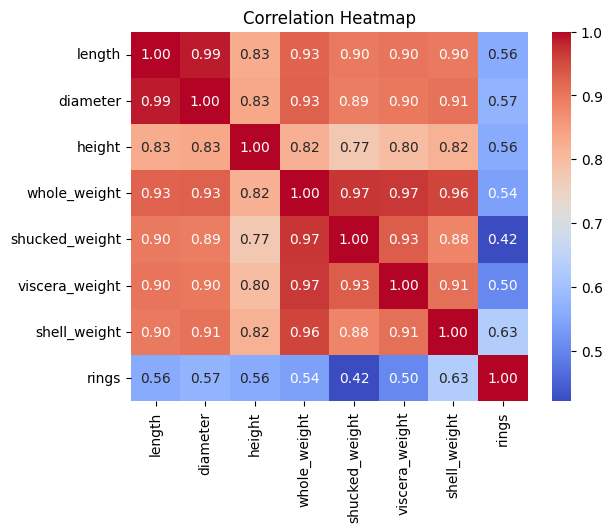

In [323]:
heatmap = sns.heatmap(correlation_array, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [324]:
correlation_array = correlation_array.abs()

('length', 'diameter')


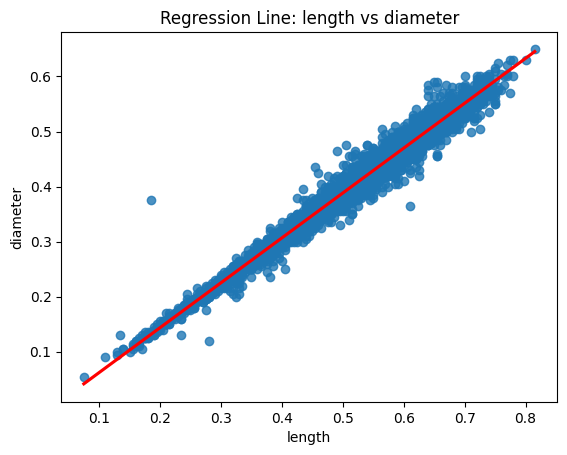

In [325]:
for i in rows2:
    correlation_array.at[i,i] = 0
correlation_array = correlation_array.unstack()
correlation_array = correlation_array.sort_values(ascending=False)
correlation_array = correlation_array.dropna().drop_duplicates()
correlation_array = correlation_array.head(1)
winning_pair = correlation_array.index[0]
print(winning_pair)

tup1, tup2 = winning_pair

lin_reg = sns.regplot(x=tup1, y=tup2, data=df, line_kws={"color": "red"})
plt.title(f'Regression Line: {tup1} vs {tup2}')
plt.xlabel(tup1)
plt.ylabel(tup2)
plt.show()


In [ ]:
result_rows = []

for col in rows2:
    for sex in ['Male', 'Female', 'Infant']:
        group_data = df[df['sex'] == sex][col]
        row = {
            'Feature': col,
            'Sex': sex,
            'mean': group_data.mean(),
            'std': group_data.std(),
            'min': group_data.min(),
            '25%': group_data.quantile(0.25),
            '50%': group_data.quantile(0.50),
            '75%': group_data.quantile(0.75),
            'max': group_data.max()
        }
        result_rows.append(row)

final_stats = pd.DataFrame(result_rows)
final_stats = final_stats.set_index(['Feature', 'Sex']).round(3)
print(final_stats)

                         mean    std    min    25%     50%     75%     max
Feature        Sex                                                        
length         Male     0.561  0.103  0.155  0.505   0.580   0.630   0.780
               Female   0.579  0.086  0.275  0.525   0.590   0.640   0.815
               Infant   0.428  0.109  0.075  0.360   0.435   0.510   0.725
diameter       Male     0.439  0.084  0.110  0.395   0.455   0.500   0.630
               Female   0.455  0.071  0.195  0.410   0.465   0.505   0.650
               Infant   0.326  0.088  0.055  0.270   0.335   0.390   0.550
height         Male     0.151  0.035  0.025  0.130   0.155   0.175   0.515
               Female   0.158  0.040  0.015  0.140   0.160   0.175   1.130
               Infant   0.108  0.032  0.000  0.085   0.110   0.130   0.220
whole_weight   Male     0.991  0.471  0.016  0.672   0.976   1.266   2.826
               Female   1.047  0.430  0.080  0.730   1.038   1.320   2.657
               Infant   0

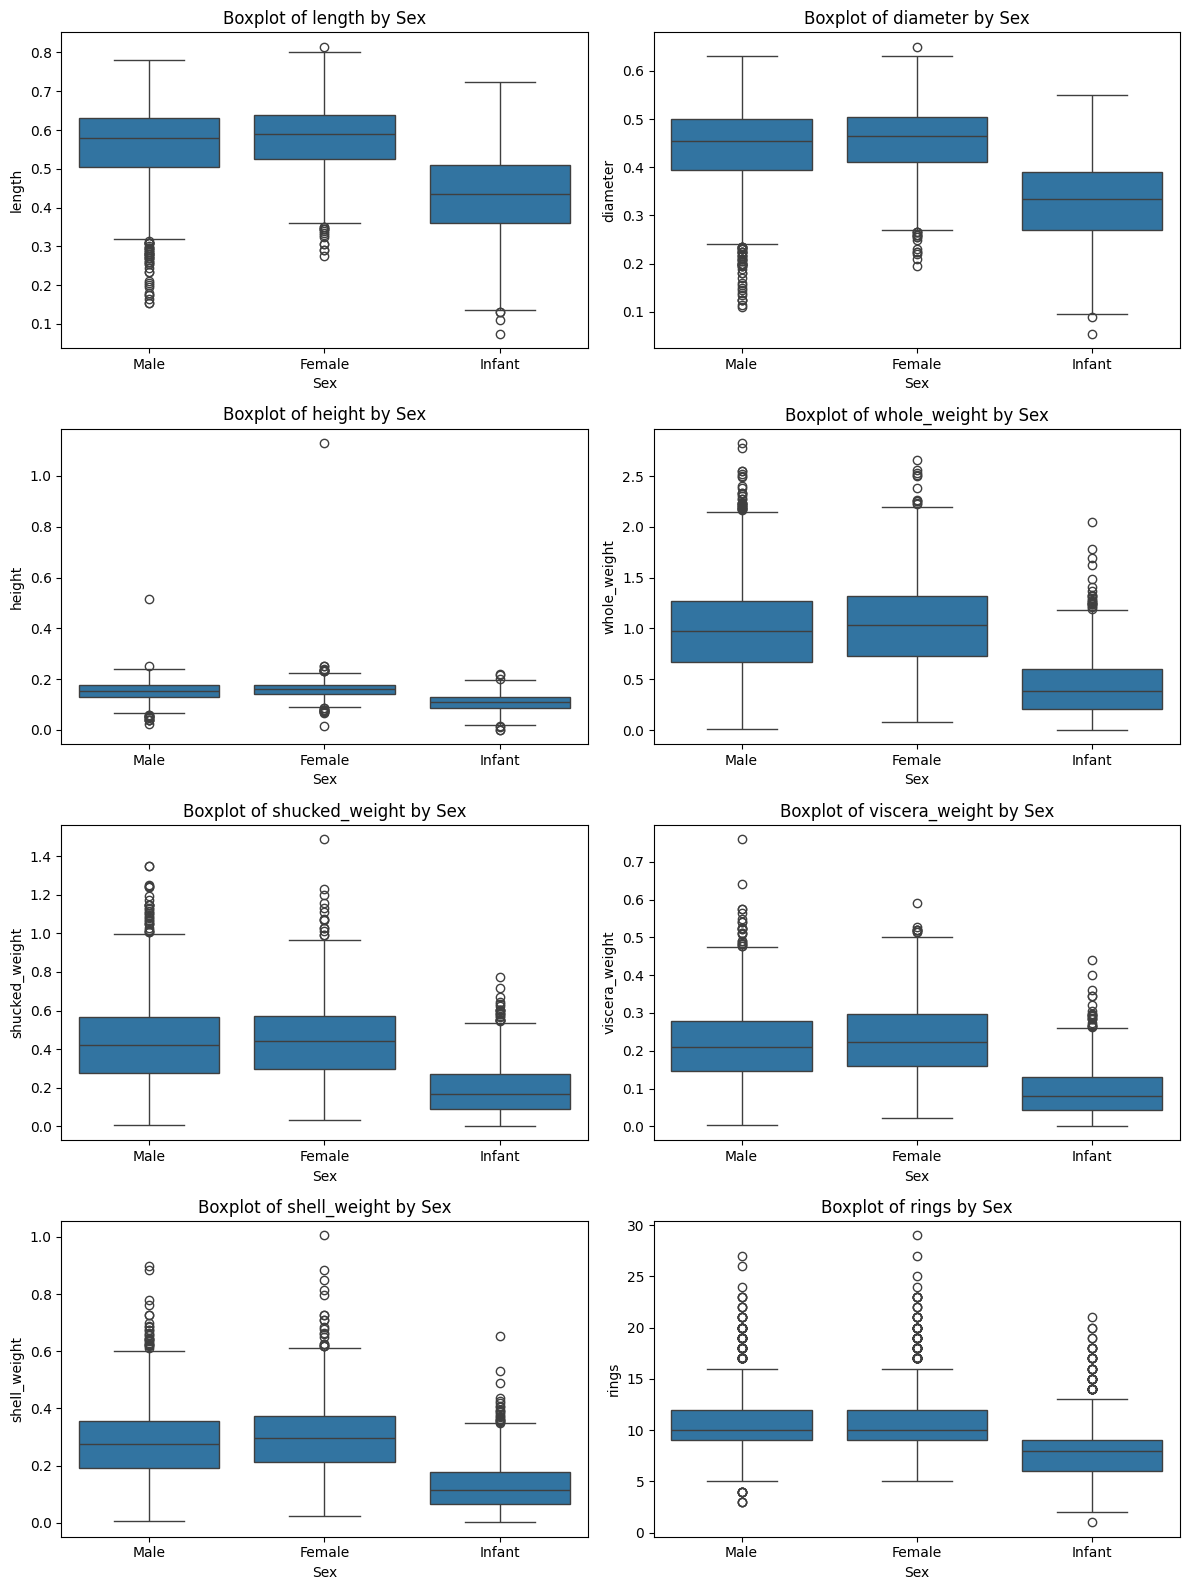

In [337]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

for i, col in enumerate(rows2):
    sns.boxplot(data=df, x='sex', y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Sex')
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()    